Лабораторная работа №4. Вариант 3. Задача №13

\begin{cases}
\frac{\partial u}{\partial t} - e^t \frac{\partial u}{\partial x} = t; 0 < t \leq 1, 0 \leq x <1\\

u(x, 0) = (x + 1)^2\\

u(1, t) = (1 + e')^2 + \frac{t^2}{2} 
\end{cases}

In [41]:
import numpy as np
import matplotlib.pyplot as plt

HOP = 1e-3
x0 = 0.525

def get_plots(u, x, x0):
	fig = plt.figure(figsize=[12, 7])
	plt.title('$u(x)$')
	plt.xlabel("$x$")
	plt.ylabel("$u$")
	plt.grid()
	plt.xticks(ticks=[0., 0.2, 0.4, x0, 0.6, 0.8, 1.0], labels=['0.', '0.2', '0.4', "$x_0$", '0.6', '0.8', '1.0'])
	plt.plot(x, u, '-')
	plt.axvline(x = x0, color = 'r')
	plt.ylim([0, 1])
	plt.xlim([0, 1])
	plt.show()

def k(x, x0):
    if x > x0:
        return x ** 2 + 1
    else: 
        return x

def q(x, x0):
    if x > x0:
        return np.exp(-x)
    else:
        return np.exp(-x)

def f(x, x0):
    if x > x0:
        return 1
    else:
        return x ** 3

def sweep(x0):
	n = int(1 / HOP)
	n_left = int(x0 / HOP)
	n_right = n_left + 1
	a = np.zeros(n + 1)
	b = np.zeros(n + 1)
	c = np.zeros(n + 1)
	d = np.zeros(n + 1)
	u = np.zeros(n + 1)
	alpha = np.zeros(n + 1)
	beta = np.zeros(n + 1)

	u[0] = 0
	u[-1] = 1

	for i in range(1, n_left):
		a[i] = k((i+ 1 / 2 ) * HOP, x0)
		b[i] = -(k((i + 1 / 2 ) * HOP, x0) + k((i - 1 / 2) * HOP, x0) + q(i * HOP, x0) * HOP ** 2)
		c[i] = k((i - 1 / 2) * HOP, x0)
		d[i] = -f(i * HOP, x0) * HOP ** 2

	for i in range(n_right + 1, n):
		a[i] = k((i + 1 / 2) * HOP, x0)
		b[i] = -(k((i + 1 / 2) * HOP, x0) + k((i - 1 / 2) * HOP, x0) + q(i * HOP, x0) * HOP ** 2)
		c[i] = k((i - 1 / 2) * HOP, x0)
		d[i] = -f(i * HOP, x0) * HOP ** 2

	alpha[1] = -a[1] / b[1]
	alpha[n - 1] = -c[n - 1] / b[n - 1]
	beta[1] = (d[1] - c[1] * u[0]) / b[1]
	beta[n - 1] = (d[n - 1] - c[n - 1] * u[n]) / b[n - 1]

	for i in range(1, n_left - 1):
		alpha[i + 1] = -a[i + 1] / (b[i + 1] + c[i + 1] * alpha[i])
		beta[i + 1] = (d[i + 1] - c[i + 1] * beta[i]) / (b[i + 1] + c[i + 1] * alpha[i])
	
	for i in range(n - 1, n_right, -1):
		alpha[i - 1] = -c[i - 1] / (b[i - 1] + a[i - 1] * alpha[i])
		beta[i - 1] = (d[i - 1] - a[i - 1] * beta[i]) / (b[i - 1] + a[i - 1] * alpha[i])

	u[n_left] = k(n_left * HOP, x0) * beta[n_left - 1] + k(n_right * HOP, x0) * beta[n_right + 1] /\
				(k(n_left * HOP, x0) * (1 - alpha[n_left - 1]) + k(n_right * HOP, x0) * (1 - alpha[n_right + 1]))
	
	u[n_right] = u[n_left]

	u[n_left - 1] = alpha[n_left - 1] * u[n_left] + beta[n_left - 1]
	u[n_right + 1] = alpha[n_right + 1] * u[n_right] + beta[n_right + 1]

	for i in range(n_left - 1, 0, -1):
		u[i] = alpha[i] * u[i + 1] + beta[i]
	
	for i in range(n_right + 1, n):
		u[i] = alpha[i] * u[i - 1] + beta[i]

	return u


/tmp/ipykernel_15453/2583100192.py:75: RuntimeWarning: invalid value encountered in double_scalars
  alpha[i - 1] = -c[i - 1] / (b[i - 1] + a[i - 1] * alpha[i])
/tmp/ipykernel_15453/2583100192.py:76: RuntimeWarning: invalid value encountered in double_scalars
  beta[i - 1] = (d[i - 1] - a[i - 1] * beta[i]) / (b[i - 1] + a[i - 1] * alpha[i])


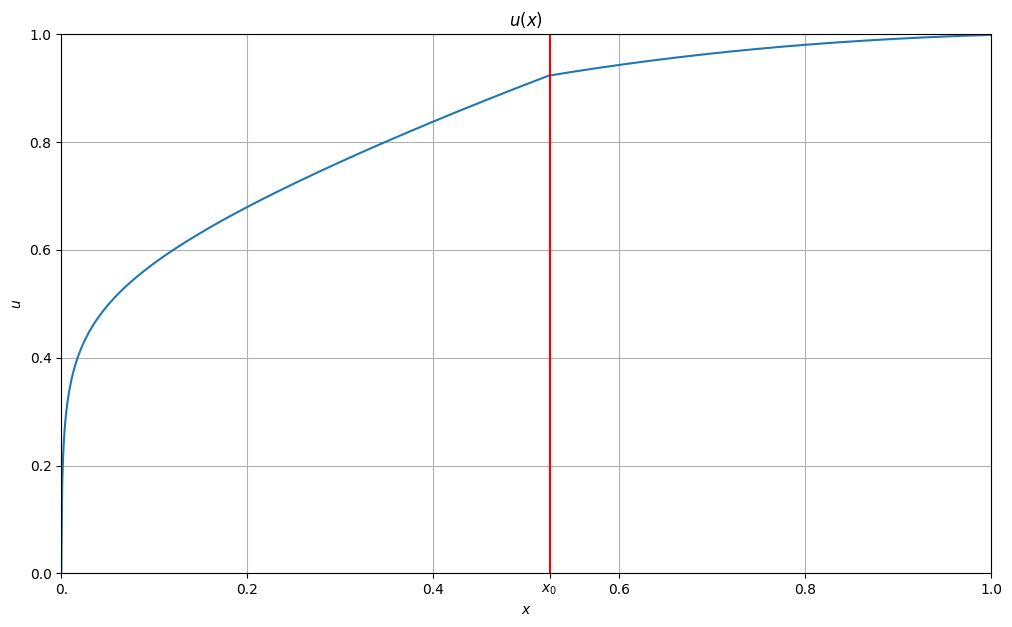

In [40]:
x = np.arange(0, 1 + HOP, HOP)
u = sweep(x0)

get_plots(u, x, x0)